# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Upper Confidence Bound (UCB)

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
# dataset relacionado con el mundo del marketing, en donde cada usuario de la muestra (10000) se le ponen diferentes anuncios sobre un mismo producto y se le agrega un 1 si el mismo hizo click o un 0 si no
# Queremos obtener el anuncio con mayor tasa de conversión (probables compras del producto)
# No es necesario separar en X ni Y, ni partir los datos en train/test

# Algoritmo de UCB

In [5]:
# Utilizamos estos 10000 datos recopilados para estimar la media poblacional de cada anuncio a traves del intérvalo de confianza de la media muestral, quedándonos con el anuncio que posea un LS mayor
# El algoritmo observará los resultados obtenidos durante las primeras 'n' rondas, y en base a esto determinará que anuncios mostrará a continuación.
# En realidad el dataset es teórico (a cada ususario se le muestran todos los anuncios), porque a nosotros en la realidad se nos mostrarían los datos de la siguiente manera: el ususario 200 vió el anuncio 5 y no hizo click, el 454 vió el 9 y si hizo click, etc

import math
N = 10000 # número de rondas/usuarios en los que se corren los anuncios(filas)
d = 10 # número de anuncios a poner a prueba (columnas)
number_of_selections = [0] * d # vector de 0 lo multiplico por la dimensión que quiero (en la primera ronda todavía no se selecciono ningún anuncio, por lo que lo inicializo en 0)
sums_of_rewards = [0] * d # también las recompensas las inicializo en 0
ads_selected = [] 
total_reward = 0 
for n in range(0, N): # ojo que las rondas comienzan en 0
    max_upper_bound = 0 # inicializo el 0 el límite superior máximo para cada ronda
    ad = 0 # inicializo en 0 el anuncio que consiguió el límite superior máximo hasta la n<N ronda (el mejor anuncio hasta la n<N ronda)
    for i in range(0, d): # calculo las métricas del Paso 2 para cada anuncio
        if(number_of_selections[i]>0): # si cada anuncio se ha seleccionado por lo menos una vez (cada anuncio no que se haya seleccionado por lo menos una vez como poseedor del mayor LS será descartado para el cálculo)
            average_reward = sums_of_rewards[i] / number_of_selections[i] # recompensa media (número de recompensas del anuncio / número de selecciones en particular)
            delta_i = math.sqrt(3/2*math.log(n+1)/number_of_selections[i]) # delta sub i. Como n empieza en 0, debo sumarle 1 para no dividir por 0
            upper_bound = average_reward + delta_i # solo calculo el límite superior, no el intérvalo de confianza entero (recompensa media + delta sub i)
        else:
            upper_bound = 1e400 # para los primeros datos indico un LS muy alto, para que no influya en el resultado final 
            # En la primer ronda (n=1), el anuncio seleccionado sería el 0, con valor 1e400 (todos tendrían el mismo valor, sin pasar por el cálculo)
            # En la segunda ronda (n=2), el único anuncio que cumpla con [i]>0 será el 0, ya seleccionado en la ronda previa, por lo que a ese se le calculará su límite superior, sin embargo, el mismo será rebasado por 1e400 del anuncio 1, siendo este el nuevo seleccionado
            # Y así en las 10 primeras rondas, lo que habremos hecho es seleccionar al menos una vez cada anuncio como el poseedor del límite superior
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound # si el límite superior supera al establecido como máximo anteriormente, lo reemplaza
            ad = i # establezco el anuncio que consiguió el limite superior máximo (el mejor anuncio hasta la n<N ronda)
    ads_selected.append(ad) # añado el mejor anuncio seleccionado para las rondas actuales
    number_of_selections[ad] = number_of_selections[ad] + 1 # contamos las veces que el anuncio ha sido seleccionado como el óptimo
    reward = dataset.values[n, ad] # averiguo que recompensa le ha dado el sistema al usuario para ese mejor anuncio de rondas actuales (0 o 1)
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward # actualizo la suma de recompensas para el mejor anuncio de rondas actuales
    total_reward = total_reward + reward # contabilizo la cantidad de recompensas totales a lo largo de todas las rondas con todos los anuncios (cantidad de ventas para comparar con respecto a la muestra de anuncios aleatorios)

total_reward # queremos ver si superamos efectivamente las 1200 ventas que en promedio obteniamos seleccionando aleatoriamente anuncios para cada usuario, ya que UCB comienza a mostrarselos a clientes según la recompensas que vaya obteniendo con los clientes previos y cuando su tendencia (LS del intérvalo) a la media poblacional de ventas de un anuncio supere a las demás.

# En ads_selected podemos ver el anuncio que se le mostró a cada usuario (vemos también las forzadas 10 primeras rondas del 0 al 9). Luego se va acomodando la muestra a medida que el algoritmo detecta que un anuncio obtiene mejores resultados (clicks) que los demás, priorizando su recomendación para que la visualicen los próximos clientes.

2178

# Histograma de resultados

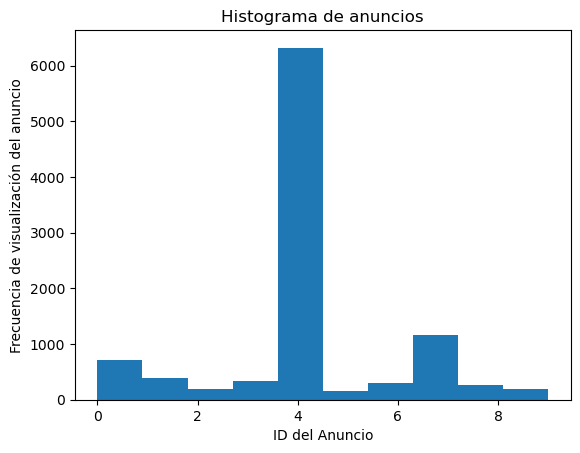

In [6]:
# Vemos que supera ampliamente las 1200 ventas de anuncios mostrados aleatoriamente, priorizando mostrar a clientes el anuncio número 5 (anuncio que debemos mostrar),
# el cual fue detectado por el algoritmo como el poseedor de la mayor media teórica o mayor conseguidor de ventas para una población (LS más grande, a partir de n rondas previas)
# La convergencia es tan buena que hasta casi que duplica la selección de anuncios aleatorios

# Histograma de frecuencias para ver en que cuantía se le mostró a los usuarios cada anuncio. Todos han sido visualizados en mayor o menor medida, siendo el 5to el de mayor tasa de conversión (por el que debemos optar)
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()